# Company 2 Company Business Analysis

This project will work on a fashion customer-to-customer (C2C) e-commerce platform that enables users to sell products to other users on the platform. The performance of a seller on the platform does not only depend on the user interface of the C2C platform, but it is also a function of the type of products uploaded by the seller, the image quality of the product, its description, customer service and social engagement of sellers (The factors are not limited to those stated). The following insights will be drawn from the available data: • Factors that contribute to sellers being able to generate good sales from the e-commerce platform • What is the typical lifetime value of a customer on the platform? • What is the average retention rate of buyers on the e-commerce platform? • Considering that the platform is situated in France, what is the tendency that other users from other countries will sign up on the platform. • How active are users generally on the e-commerce platform?

## Modeling
* Fit Models with Training Data Set
* Review Model Outcomes — Iterate over additional models as needed.
* Identify the Final Model

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import preprocessing
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split
import pickle 
from sklearn.metrics import explained_variance_score,mean_absolute_error

Import dataset for seller

The dataset used for this modelling have been normalized and scaled during the preprocessing stage of this project

In [2]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/capstone_three/C2C Business Analytics/data'
os.chdir(path)
yseller_train = pd.read_csv('yseller_train.csv')
yseller_test = pd.read_csv('yseller_test.csv')
Xseller_train = pd.read_csv('Xseller_train.csv')
Xseller_test = pd.read_csv('Xseller_test.csv')

In [3]:
yseller_train.head(10)

,Unnamed: 0,ScproductsSold
0,52379,-0.121688
1,38164,-0.121688
2,88130,-0.121688
3,56584,-0.121688
4,85503,-0.121688
5,16078,-0.121688
6,66502,-0.121688
7,22275,-0.121688
8,38470,-0.121688
9,66713,-0.121688


In [4]:
Xseller_train.shape

(74184, 225)

In [5]:
yseller_train = yseller_train.drop(['Unnamed: 0'], axis=1)
yseller_test = yseller_test.drop(['Unnamed: 0'], axis=1)
Xseller_train = Xseller_train.drop(['Unnamed: 0'], axis=1)
Xseller_test = Xseller_test.drop(['Unnamed: 0'], axis=1)

Import dataset for buyer

In [6]:
ybuyer_train = pd.read_csv('ybuyer_train.csv')
ybuyer_test = pd.read_csv('ybuyer_test.csv')
Xbuyer_train = pd.read_csv('Xbuyer_train.csv')
Xbuyer_test = pd.read_csv('Xbuyer_test.csv')

In [7]:
ybuyer_train = ybuyer_train.drop(['Unnamed: 0'], axis=1)
ybuyer_test = ybuyer_test.drop(['Unnamed: 0'], axis=1)
Xbuyer_train = Xbuyer_train.drop(['Unnamed: 0'], axis=1)
Xbuyer_test = Xbuyer_test.drop(['Unnamed: 0'], axis=1)

Import dataset for Unscaled dataframe

In [8]:
yPseller_train = pd.read_csv('yPseller_train.csv')
yPseller_test = pd.read_csv('yPseller_test.csv')
XPseller_train = pd.read_csv('XPseller_train.csv')
XPseller_test = pd.read_csv('XPseller_test.csv')

In [9]:
yPseller_train.head()

,Unnamed: 0,productsSold
0,52379,0
1,38164,0
2,88130,0
3,56584,0
4,85503,0


In [10]:
yPseller_train = yPseller_train.drop(['Unnamed: 0'], axis=1)
yPseller_test = yPseller_test.drop(['Unnamed: 0'], axis=1)
XPseller_train = XPseller_train.drop(['Unnamed: 0'], axis=1)
XPseller_test = XPseller_test.drop(['Unnamed: 0'], axis=1)

In [11]:
yPbuyer_train = pd.read_csv('yPbuyer_train.csv')
yPbuyer_test = pd.read_csv('yPbuyer_test.csv')
XPbuyer_train = pd.read_csv('XPbuyer_train.csv')
XPbuyer_test = pd.read_csv('XPbuyer_test.csv')

In [12]:
yPbuyer_train = yPbuyer_train.drop(['Unnamed: 0'], axis=1)
yPbuyer_test = yPbuyer_test.drop(['Unnamed: 0'], axis=1)
XPbuyer_train = XPbuyer_train.drop(['Unnamed: 0'], axis=1)
XPbuyer_test = XPbuyer_test.drop(['Unnamed: 0'], axis=1)

Import main X dataframes

In [13]:
Xseller = pd.read_csv('Xseller.csv')
Xbuyer = pd.read_csv('Xbuyer.csv')
XPseller = pd.read_csv('XPseller.csv')
XPbuyer = pd.read_csv('XPbuyer.csv')

In [14]:
Xseller = Xseller.drop(['Unnamed: 0'], axis=1)
Xbuyer = Xbuyer.drop(['Unnamed: 0'], axis=1)
XPseller = XPseller.drop(['Unnamed: 0'], axis=1)
XPbuyer = XPbuyer.drop(['Unnamed: 0'], axis=1)

In [15]:
yseller = pd.read_csv('yseller.csv', header = None)
ybuyer = pd.read_csv('ybuyer.csv',header = None)
yPseller = pd.read_csv('yPseller.csv',header = None)
yPbuyer = pd.read_csv('yPbuyer.csv',header = None)

In [16]:
yseller = yseller.drop([0], axis=1)
ybuyer = ybuyer.drop([0], axis=1)
yPseller = yPseller.drop([0], axis=1)
yPbuyer = yPbuyer.drop([0], axis=1)

Feature Selection 

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.dummy import DummyRegressor

### Using the Dummy Regressor to determine the baseline performance for other models 

In [18]:
 from sklearn.dummy import DummyRegressor

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	np.seterr(divide='ignore', invalid='ignore')
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(Xseller_train, yseller_train.values.ravel())
	# transform train input data
	X_train_fs = fs.transform(Xseller_train)
	# transform test input data
	X_test_fs = fs.transform(Xseller_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(Xseller_train, yseller_train, Xseller_test)
# fit the model
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_fs, yseller_train)
# evaluate the model
yhat = dummy_regr.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(yseller_test,yhat)
print('MAE: %.3f' % mae)


MAE: 0.233


In [19]:
dummy_regr.score(X_train_fs, yseller_train)

0.0

In [20]:
dummy_regr.score(X_test_fs,yseller_test)

-0.0001326124669798201

#### Multiple Linear Regression for Sellers

In [21]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	np.seterr(divide='ignore', invalid='ignore')
	fs = SelectKBest(score_func=f_regression, k=20)
	# learn relationship from training data
	fs.fit(Xseller_train, yseller_train.values.ravel())
	cols = fs.get_support(indices=True)
    # transform train input data
	X_train_fs = fs.transform(Xseller_train)
	X_train_fs = Xseller_train.iloc[:,cols]
    # transform test input data
	X_test_fs = fs.transform(Xseller_test)
	X_test_fs = Xseller_test.iloc[:,cols]
	return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(Xseller_train, yseller_train, Xseller_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, yseller_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(yseller_test,yhat)
print('MAE: %.3f' % mae)

MAE: 0.113


In [22]:
explained_variance_score(yseller_test,yhat)

0.7943288722212916

In [23]:
LR_Train = model.score(X_train_fs, yseller_train)*100

LR_Train

81.60825819126237

In [24]:
LR_Test = model.score(X_test_fs,yseller_test)*100

LR_Test

79.42886652956831

In [25]:
pd.DataFrame(abs(model.coef_).T, X_train_fs.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(20)

,Coefficient
ScproductsPassRate,0.585766
ScproductsListed,0.278973
country_Bulgarie,0.236275
ScSocialNbFollowers,0.203112
country_Croatie,0.194417
country_Monaco,0.184291
civilityTitle_miss,0.165388
hasAnyApp,0.101891
hasProfilePicture,0.094784
hasAndroidApp,0.093345


The features' ranking is absurd as the first three coefficients displayed had figures that do not support the underlying distribution of the features. For instance, the civilityGenderId feature is a boolean feature before transformation but it gave a coefficient that do not support the expected impact it should have on the dependent variable. As a result, cross validation will be carried out to confirm if the score gotten is right.

In [26]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

lm = LinearRegression()
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train_fs, yseller_train, scoring='r2', cv=folds)
scores 

array([0.8140221 , 0.83904265, 0.81464461, 0.797932  , 0.80915349])

The scores gotten from the cross validation process above are in the range of the initial model done for the seller dataframe. To affirm the performance of the linear model, GridsearchCV will be carried out the datset

### Using GridSearch on Seller Dataset

In [27]:
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_fs, yseller_train.values.ravel())
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_fs, yseller_train.values.ravel())  

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.284188,0.016798,0.004276,0.000114,1,{'n_features_to_select': 1},0.730823,0.750827,0.717511,0.719100,...,0.726277,0.013599,19,0.725151,0.720285,0.728370,0.727966,0.730131,0.726381,0.003441
1,0.270979,0.004315,0.004804,0.000134,2,{'n_features_to_select': 2},0.730522,0.750641,0.793847,0.718625,...,0.741329,0.029255,18,0.725265,0.720495,0.792963,0.728094,0.730337,0.739431,0.026967
2,0.264168,0.001435,0.005635,0.000089,3,{'n_features_to_select': 3},0.730369,0.822866,0.793957,0.768413,...,0.780420,0.030565,17,0.725477,0.785848,0.793035,0.798545,0.795094,0.779600,0.027378
3,0.262872,0.003054,0.006637,0.001085,4,{'n_features_to_select': 4},0.790603,0.822850,0.794047,0.768332,...,0.792457,0.017594,16,0.793962,0.785884,0.793089,0.798635,0.795422,0.793399,0.004204
4,0.282221,0.034833,0.004188,0.000297,5,{'n_features_to_select': 5},0.790625,0.822390,0.812383,0.796013,...,0.805890,0.011399,14,0.794275,0.786292,0.814553,0.818073,0.815961,0.805831,0.012991
5,0.306422,0.040796,0.005013,0.001656,6,{'n_features_to_select': 6},0.790714,0.822322,0.812426,0.796004,...,0.805874,0.011356,15,0.794330,0.786384,0.814562,0.818080,0.815967,0.805865,0.012957
6,0.284387,0.040463,0.004018,0.000131,7,{'n_features_to_select': 7},0.812296,0.838384,0.812439,0.795999,...,0.813427,0.013843,12,0.814824,0.808290,0.814565,0.818081,0.815986,0.814349,0.003274
7,0.234627,0.002637,0.004123,0.000053,8,{'n_features_to_select': 8},0.812300,0.838321,0.812436,0.795998,...,0.813400,0.013826,13,0.814995,0.808299,0.814565,0.818116,0.816180,0.814431,0.003304
8,0.226132,0.000983,0.004217,0.000108,9,{'n_features_to_select': 9},0.812303,0.838313,0.812399,0.796287,...,0.813450,0.013751,11,0.815006,0.808308,0.814607,0.818186,0.816190,0.814459,0.003318
9,0.215340,0.006737,0.004792,0.000475,10,{'n_features_to_select': 10},0.812295,0.838333,0.812748,0.796674,...,0.813601,0.013657,10,0.815006,0.808336,0.814645,0.818259,0.816191,0.814488,0.003325


The performance of the gridsearch using the RFE feature selection shows that features above 4 might be too optimistic with performance as perfect scores of 1 was achieved with both train and test datasets. The graph below shows a perfectly fit model at every feature level selected. The optimal number of feature based on the r-square scores is 4. 

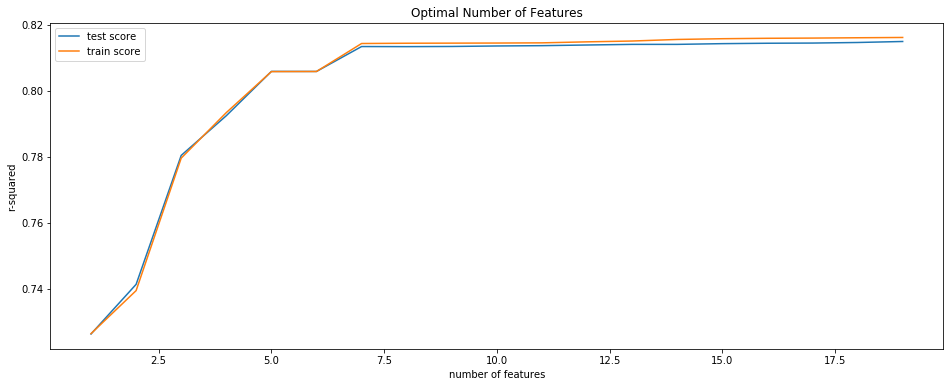

In [29]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Lasso Regression for the seller dataset will be done to select the features that best impact sales on the C2C platform.

## Dummy regression for buyer's dataset

In [30]:
 from sklearn.dummy import DummyRegressor

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	np.seterr(divide='ignore', invalid='ignore')
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(Xbuyer_train, ybuyer_train.values.ravel())
	# transform train input data
	X_train_fs = fs.transform(Xbuyer_train)
	# transform test input data
	X_test_fs = fs.transform(Xbuyer_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fsm, X_test_fsm, fs = select_features(Xbuyer_train, ybuyer_train, Xbuyer_test)
# fit the model
dummy_regr1 = DummyRegressor(strategy="mean")
dummy_regr1.fit(X_train_fsm, ybuyer_train)
# evaluate the model
yhat = dummy_regr1.predict(X_test_fsm)
# evaluate predictions
mae = mean_absolute_error(ybuyer_test,yhat)
print('MAE: %.3f' % mae)



MAE: 0.392


In [31]:
dummy_regr1.score(X_train_fsm, ybuyer_train)

0.0

In [32]:
dummy_regr1.score(X_test_fsm,ybuyer_test)

-4.911952073727299e-05

The scores above serve as the baseline scores for the models to be used for the buyer dataset.

### Multiple Linear Regression for buyers

In [33]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	np.seterr(divide='ignore', invalid='ignore')
	fs = SelectKBest(score_func=f_regression, k=25)
	# learn relationship from training data
	fs.fit(Xbuyer_train, ybuyer_train.values.ravel())
	cols = fs.get_support(indices=True)
    # transform train input data
	X_train_fs = fs.transform(Xbuyer_train)
	X_train_fs = Xbuyer_train.iloc[:,cols]
    # transform test input data
	X_test_fs = fs.transform(Xbuyer_test)
	X_test_fs = Xbuyer_test.iloc[:,cols]
	return X_train_fs, X_test_fs, fs


# feature selection
X_train_fsb, X_test_fsb, fsb = select_features(Xbuyer_train, ybuyer_train, Xbuyer_test)
# fit the model
model1 = LinearRegression()
model1.fit(X_train_fsb, ybuyer_train)
# evaluate the model
yhatb = model1.predict(X_test_fsb)
# evaluate predictions
mae = mean_absolute_error(ybuyer_test,yhatb)
print('MAE: %.3f' % mae)

MAE: 0.317


In [34]:
explained_variance_score(ybuyer_test,yhatb)

0.34410985053352094

In [35]:
LRB_Train = model1.score(X_train_fsb, ybuyer_train) * 100

LRB_Train

32.26029935407181

In [36]:
LRB_Test = model1.score(X_test_fsb,ybuyer_test) * 100

LRB_Test

34.410982834051474

The linear regression performed better than the baseline model. Out of the 224 features in the buyer dataset, to best 100 were selected for the model.

In [37]:
pd.DataFrame(abs(model1.coef_).T, X_train_fsb.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(20)

,Coefficient
civilityTitle_mrs,2.427179e+11
civilityTitle_miss,2.427179e+11
gender_F,8.193871e+10
civilityTitle_mr,8.058523e+10
gender_M,8.019395e+10
hasAnyApp,4.573222e-01
hasAndroidApp,4.225866e-01
country_Luxembourg,3.889980e-01
hasIosApp,3.601939e-01
ScproductsWished,2.785624e-01


Languages topped important features' raking with respect to determining the features that influnce buyers most on the platform. Other high ranking features are gender, and type of mobile operating system. However, judging by the score of these top ranking features, the coefficient scores came out spurious. These scores cannot be possible as the underlying distribution cannot support the figures generated by the model. As a result, cross validation will be done on the linear model

In [38]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

lm = LinearRegression()
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train_fsb, ybuyer_train, scoring='r2', cv=folds)
scores 

array([0.33036927, 0.32200925, 0.30510173, 0.326811  , 0.31892875])

The scores above are very similar to the scores generated from the linear regression above. To further confirm the suitability of the linear regression model for the dataframe, gridsearchcv will be done to view performance of the model with respect to different number of features

In [39]:
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 21))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_fsb, ybuyer_train.values.ravel())
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_fsb, ybuyer_train.values.ravel())  

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20]}],
             return_train_score=True, scoring='r2', verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.480699,0.037823,0.005737,0.000771,1,{'n_features_to_select': 1},0.000521,0.000735,0.001106,0.000948,...,0.000787,0.000213,20,0.000752,0.000704,0.000603,0.000647,0.000418,0.000625,0.000115
1,0.452323,0.019864,0.006458,0.001365,2,{'n_features_to_select': 2},0.000987,0.001315,0.001064,0.000973,...,0.000982,0.000239,16,0.001056,0.000970,0.001028,0.001056,0.001151,0.001052,0.000059
2,0.414733,0.010171,0.006675,0.000283,3,{'n_features_to_select': 3},0.000775,0.001312,0.001196,0.000959,...,0.000888,0.000392,17,0.000970,0.000969,0.000940,0.000961,0.001064,0.000981,0.000043
3,0.405676,0.000832,0.006358,0.000173,4,{'n_features_to_select': 4},0.000953,0.001334,0.000766,0.000696,...,0.000870,0.000260,19,0.000945,0.000969,0.000940,0.000965,0.001060,0.000976,0.000043
4,0.413826,0.016094,0.005685,0.000195,5,{'n_features_to_select': 5},0.000967,0.001332,0.000764,0.000704,...,0.000879,0.000253,18,0.000970,0.000970,0.000940,0.000968,0.001068,0.000983,0.000044
5,0.397522,0.003326,0.004573,0.000368,6,{'n_features_to_select': 6},0.000610,0.006036,0.002474,0.002949,...,0.002428,0.002104,15,0.003126,0.009048,0.002697,0.002592,0.001794,0.003851,0.002634
6,0.391185,0.002540,0.004495,0.000068,7,{'n_features_to_select': 7},0.009305,0.008653,0.011159,0.011259,...,0.053629,0.087076,14,0.011227,0.011445,0.010796,0.010790,0.230540,0.054960,0.087791
7,0.384404,0.002717,0.004444,0.000025,8,{'n_features_to_select': 8},0.007967,0.010350,0.010685,0.012763,...,0.063318,0.105764,13,0.014391,0.013998,0.013876,0.013383,0.284098,0.067949,0.108075
8,0.376204,0.001107,0.004478,0.000015,9,{'n_features_to_select': 9},0.007179,0.243953,0.010438,0.241754,...,0.155616,0.120439,12,0.015008,0.228486,0.014414,0.229219,0.284188,0.154263,0.115722
9,0.368929,0.002181,0.004595,0.000128,10,{'n_features_to_select': 10},0.237906,0.244465,0.200118,0.291468,...,0.254371,0.036286,11,0.230476,0.228635,0.240036,0.280642,0.313816,0.258721,0.033371


Contrary to the scores generated by the linear model with and without cross_validation, the gridsearch scores performed worse. An obvious trend is that both the train and test scores increased with increasing number of features. Although, this is expected to be the case and the best score was notched with 20 features selected. Perhaps, the score could reach that gotten from the linear model above but it will be a trade off with time as the total taken to complete 100 iterations was 2.5hrs

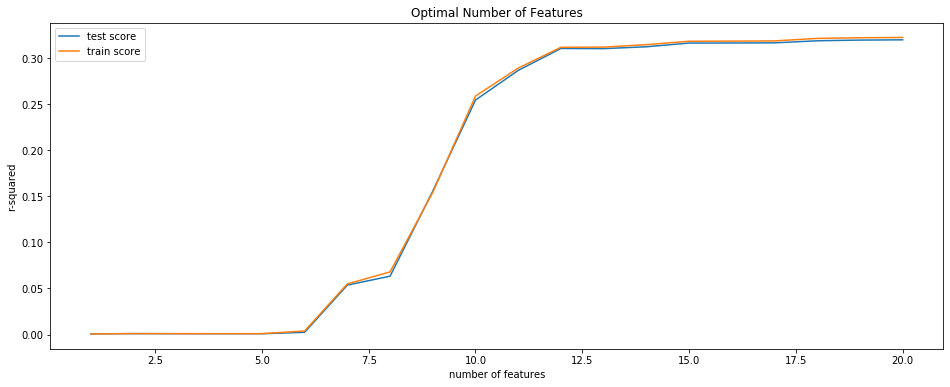

In [41]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## Using Lasso Regression for Sellers

In [42]:
from sklearn.linear_model import Lasso

In [43]:
reg = Lasso(alpha=0.5)
reg.fit(Xseller_train, yseller_train)

Lasso(alpha=0.5)

In [44]:
reg.score(Xseller_train, yseller_train)*100

51.00300952798034

In [45]:
reg.score(Xseller_test, yseller_test)*100

53.06857269959675

With alpha set at 0.5, the Lasso regression performs worse than linear regression. Lambda will be varied to get the best alpha for the lasso regression model

In [46]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = Xseller.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [47]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(Xseller_train, yseller_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(Xseller_train, yseller_train)
    test_r_squared[ind] = reg.score(Xseller_test, yseller_test)

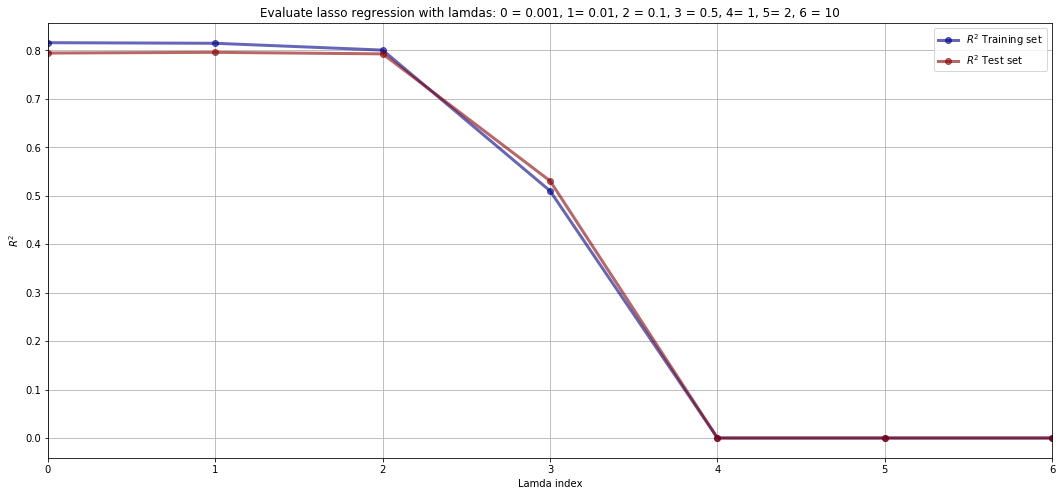

In [48]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [49]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    79.598508
lambda        0.010000
Name: 1, dtype: float64

At alpha of 0.01, the model scored better than 0.5 and the scores came close to that gotten when 4 features were selected using GridSearchCV with linear regression model

In [50]:
columns = Xseller_train.columns
# Coefficients of best model
reg_best = Lasso(alpha = 0.01)
reg_best.fit(Xseller_train, yseller_train)
pd.DataFrame(abs(reg_best.coef_), Xseller_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(10)

,Coefficient
ScproductsPassRate,0.584807
ScproductsListed,0.279057
ScSocialNbFollowers,0.178960
ScdaysSinceLastLogin,0.007862
ScsocialProductsLiked,0.007760
ScproductsWished,0.007479
ScsocialNbFollows,0.003936
ScproductsBought,0.001035
civilityGenderId,0.000000
country_Portugal,0.000000


In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yseller_test, reg_best.predict(Xseller_test))

0.17540501993357652

In [52]:
l_min = 0.001
l_max = 0.5
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = Xseller.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [53]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(Xseller_train, yseller_train)
    results = cross_val_score(reg, Xseller, yseller, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(Xseller_train, yseller_train)    
    test_r_squared[ind] = reg.score(Xseller_test, yseller_test)

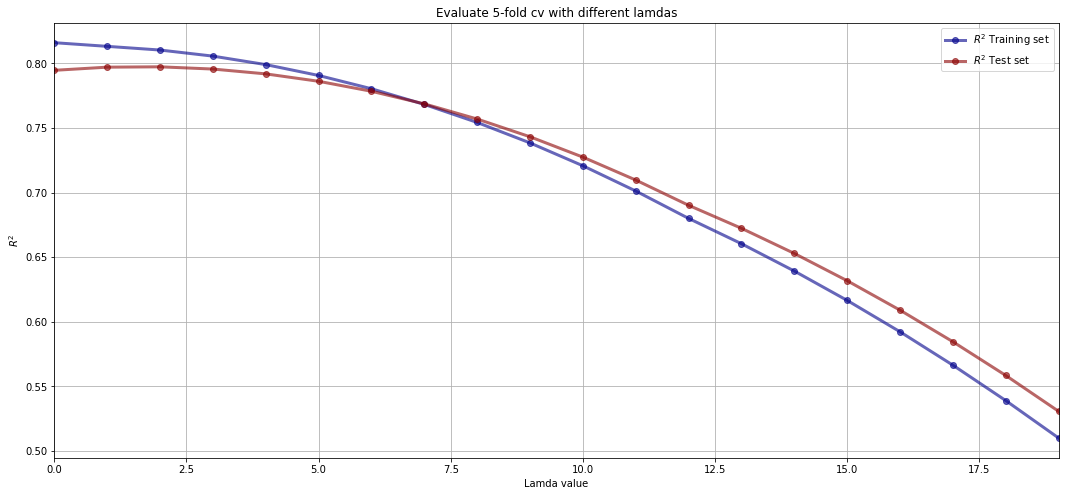

In [54]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [55]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    79.726225
lambda        0.053526
Name: 2, dtype: float64

In [56]:
# Best Model
reg_best = Lasso(alpha = 0.05)
reg_best.fit(Xseller_train, yseller_train)

Lasso(alpha=0.05)

In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(yseller_test, reg_best.predict(Xseller_test))

0.17423834682862116

In [58]:
Lasso_Train = reg_best.score(Xseller_train, yseller_train) * 100

Lasso_Train

81.07393187540852

In [59]:
Lasso_Test = reg_best.score(Xseller_test, yseller_test)*100

Lasso_Test

79.73420449153453

The scores for both train and test datasets for sellers are equal to those gotten from Linear regression model. The performance above was gotten after cross_validation was done on the dataset using Lasso Regression and the best lambda for R_squared was selected to be 0.0535

In [60]:
pd.DataFrame(abs(reg_best.coef_), Xseller_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(10)

,Coefficient
ScproductsPassRate,0.568701
ScproductsListed,0.264111
ScSocialNbFollowers,0.150374
civilityGenderId,0.000000
country_Rwanda,0.000000
country_Pays-Bas,0.000000
country_Philippines,0.000000
country_Pologne,0.000000
country_Polynésie Française,0.000000
country_Portugal,0.000000


For both seller models, the Lasso regression results will be used. The linear regression model had good R-squared scores but the coefficients generated for the top 3 features were absurdly hgih. The grid search results for the seller dataframe looked too optimistic as the perfect scores of 1 were scored for variables greater than 4. For features lower than lower than 5, the best most reasonable scores were attained when 4 features were selected. The scores for the train dataset was 80.2% while the test score was 80.1%  On the flip side, lasso regression for the seller dataframe had good  r-squre scores for both train and test datasets. 81% score was attained for train dataset using CV and 79.7% for test score with alpha at 0.05. 

Using the 3 best features from Lasso regression, productsPassRate had coefficient of 0.569, productsListed had a score of 0.26411 and socialNbFollowers was 0.1503. Because of the Lasso regression's inner workings of reducing features that do not contribute much to the performance of the dependent variable, the other features selected from the original 224 features were reduced to 0. 

As a result, a seller has more chance of getting products sold with higher product pass rate. Also, the higher the number of products listed by sellers, the greater the chance of making sales on the platform. Finally, due to the platform being structured as a social e-commerce one where users can follow each other, the more users follow an individual categorized as seller, the better it is for such individual to make sales on the platform.

## Lasso Regression on Buyer Dataset

In [61]:
regb = Lasso(alpha=0.01)
regb.fit(Xbuyer_train, ybuyer_train)

Lasso(alpha=0.01)

alpha 0.5 gave poor R-square scores for bothtrain and test dataset. It was adjusted to 0.01 and better score was gotten

In [62]:
regb.score(Xbuyer_train, ybuyer_train)*100

31.89612419473775

In [63]:
regb.score(Xbuyer_test, ybuyer_test)*100

34.03659082358275

The R-square for both train and test datasets above came out similar to the origial one from the linear regression above. To determine if better performance can be gotten from Lasso regression, lambda will be varied.

In [64]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = Xseller.shape[1]

# prepare data for enumerate
coeff_b = np.zeros((l_num, pred_num))
train_r_squaredb = np.zeros(l_num)
test_r_squaredb = np.zeros(l_num)

In [65]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    regb = Lasso(alpha = i)
    regb.fit(Xseller_train, yseller_train)

    coeff_b[ind,:] = regb.coef_
    train_r_squaredb[ind] = regb.score(Xseller_train, yseller_train)
    test_r_squaredb[ind] = regb.score(Xseller_test, yseller_test)

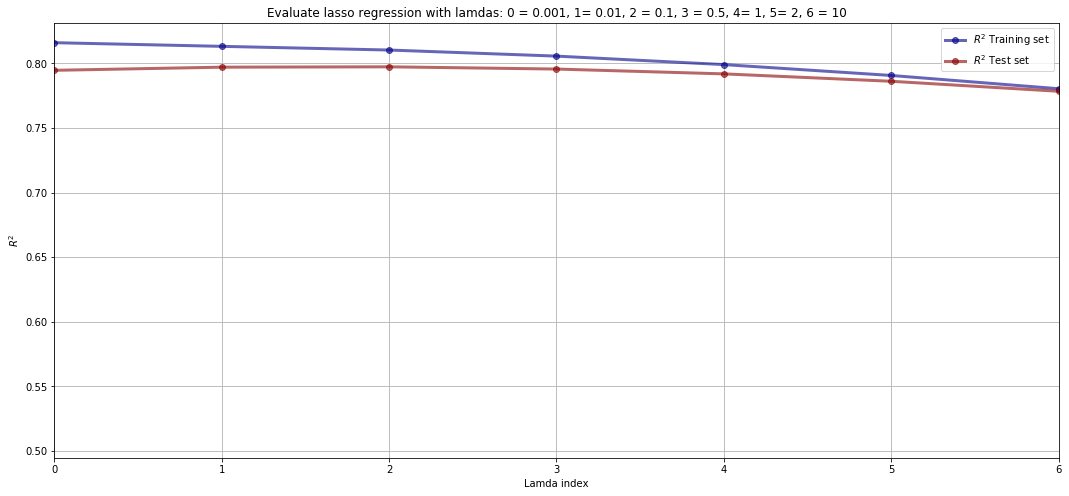

In [66]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [67]:
df_lam = pd.DataFrame(test_r_squaredb*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    79.598508
lambda        0.010000
Name: 1, dtype: float64

At lambda 0.01, a better R_squared of 79.6% was gotten. This is obiviously better than the score from linear regression.

In [68]:
columns = Xbuyer_train.columns
# Coefficients of best model
reg_bestb = Lasso(alpha = 0.01)
reg_bestb.fit(Xbuyer_train, ybuyer_train)
pd.DataFrame(abs(reg_bestb.coef_), Xbuyer_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(20)

,Coefficient
ScproductsWished,0.279322
ScSocialNbFollowers,0.190072
ScdaysSinceLastLogin,0.181460
ScsocialProductsLiked,0.090362
civilityGenderId,0.044107
ScproductsListed,0.035308
ScproductsSold,0.019976
hasAnyApp,0.011291
ScsocialNbFollows,0.007979
hasIosApp,0.000646


Ten coefficients were selected from 224 to impact buyers' behaviors on the C2C platform. If a buyer marks a listed product of a seller as product wish, the buyer might eventually purchase such product.The other features to make the top 5 list are number of followers, last log in time (how frequent a buyer is on the platform), products liked, and gender. Some features peculiar to sellers came out important also. Products listed and products sold. As seen below, the mean error is low which shows that there is no much difference between the predicted values and the original test set.

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ybuyer_test, reg_bestb.predict(Xbuyer_test))

0.6971675895376435

The affirm the perfomance of the Lasso regression above, cross_validation will be done at different lambda marks and best lambda will be used to get the best scores and the best features

In [70]:
l_min = 0.001
l_max = 0.5
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squaredb = np.zeros(l_num)
test_r_squaredb = np.zeros(l_num)

pred_numb = Xbuyer.shape[1]
coeff_b = np.zeros((l_num, pred_numb))

In [71]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    regb = Lasso(alpha = i)
    regb.fit(Xbuyer_train, ybuyer_train)
    results = cross_val_score(regb, Xbuyer, ybuyer, cv=5, scoring="r2")

    train_r_squaredb[ind] = regb.score(Xbuyer_train, ybuyer_train)    
    test_r_squaredb[ind] = regb.score(Xbuyer_test, ybuyer_test)

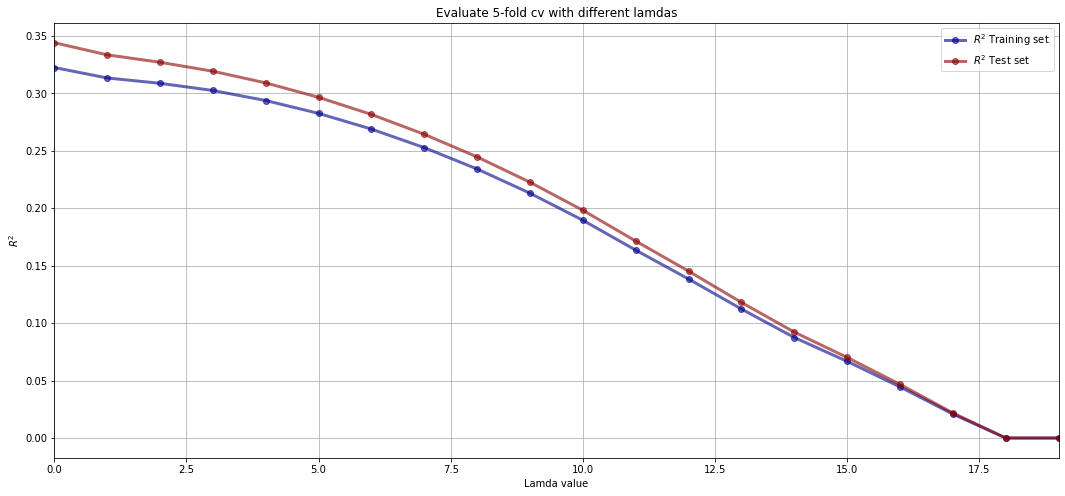

In [72]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squaredb, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squaredb, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [73]:
df_lam = pd.DataFrame(test_r_squaredb*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    34.402929
lambda        0.001000
Name: 0, dtype: float64

At 0.001, the R-square of 34.4% came out similar to the score from linear regression 

In [74]:
# Best Model
reg_bestb = Lasso(alpha = 0.001)
reg_bestb.fit(Xbuyer_train, ybuyer_train)

Lasso(alpha=0.001)

In [75]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ybuyer_test, reg_bestb.predict(Xbuyer_test))

0.6932957626448616

In [76]:
LassoB_Train = reg_bestb.score(Xbuyer_train, ybuyer_train) * 100

LassoB_Train

32.24327525306004

In [77]:
LassoB_Test = reg_bestb.score(Xbuyer_test, ybuyer_test)*100

LassoB_Test

34.402928710514935

In [78]:
pd.DataFrame((abs(reg_bestb.coef_)*(Xbuyer_train.std())), Xbuyer_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(40)

,Coefficient
ScproductsWished,0.276850
ScSocialNbFollowers,0.212661
ScdaysSinceLastLogin,0.194245
ScsocialProductsLiked,0.097570
ScproductsSold,0.045731
ScproductsListed,0.045138
civilityGenderId,0.042661
hasIosApp,0.021687
country_Allemagne,0.013740
ScsocialNbFollows,0.013010


For the buyer models, the Lasso regression results will be used. The linear regression model had similar R-squared scores but the coefficients generated for the top 10 features were absurdly hgih. The grid search results for the buyer dataframe performed with increasing number of features. The best score was gotten when 20 features were selected. The train score of 24.3% and test score of 24% scored way lower than the scores at gotten from Lasso regression. Lasso regression for the buyer dataframe had r-square scores similar to the original buyer linear regression for both train and test datasets . 32.24% score was attained for train dataset using CV and 34.4% for test score with alpha at 0.001. 

Using the 3 best features from Lasso regression, productsWished had coefficient of 0.277, social number of followers had a score of 0.213 and days since last log in was 0.194. Because of the Lasso regression's inner workings of reducing features that do not contribute much to the performance of the dependent variable, the other features 201 selected from the original 224 features were reduced to 0. 

As a result, a buyer will likely buy products he has selected as wished products and the freuency of buyer on the platform will contribute to buying products also. Since it is a C2C platform, sellers that a using the application often also are likely to buy products on the platform.

## Using Ensemble Models

Predict Using Seller Dataset

### ADABOOST

In [79]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=0, learning_rate=1, n_estimators=100)
model.fit(X_train_fs, yseller_train.values.ravel())
yhat = model.predict(X_test_fs)

Adatrain_score = model.score(X_train_fs,yseller_train)*100

#test_score = model.score(X_test_fs,yseller_test)

Adatrain_score



#X_train_fs, X_test_fs

-84.02593623535142

In [80]:
Adatest_score = model.score(X_test_fs,yseller_test) * 100

Adatest_score

-129.70968944061804

## GradientBoost

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(max_features=10,max_depth=5)
#model.fit(X_train_fs, yseller_train.values.ravel())
#model.score(X_train_fs,yseller_train)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_fs, yseller_train.values.ravel(), scoring='r2', cv=folds)
scores.mean() * 100


85.67321792561262

In [82]:
model= GradientBoostingRegressor(max_features=10,max_depth=5)
model.fit(X_train_fs, yseller_train.values.ravel())
GB_train = model.score(X_train_fs,yseller_train)*100
GB_train

90.16329210316965

In [83]:
GB_test = model.score(X_test_fs,yseller_test)*100
GB_test

83.46508895213628

In [84]:
pd.DataFrame(abs(model.feature_importances_), X_train_fs.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(10)

,Coefficient
ScproductsPassRate,0.660306
ScproductsListed,0.189246
ScSocialNbFollowers,0.101497
ScdaysSinceLastLogin,0.016673
hasProfilePicture,0.006528
ScsocialProductsLiked,0.006478
ScsocialNbFollows,0.004969
ScproductsBought,0.003743
ScproductsWished,0.003350
civilityTitle_miss,0.001706


## XGBOOST

In [85]:
import xgboost as xgb
model=xgb.XGBRegressor(booster = 'gblinear', subsample=0.1,colsample_bytree=0.1)
#model.fit(X_train_fs, yseller_train.values.ravel())
#model.score(X_test_fs,yseller_test)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_fs, yseller_train.values.ravel(), scoring='r2', cv=folds)
scores.mean() * 100

[22:35:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


71.81971043573718

In [86]:
model=xgb.XGBRegressor(booster = 'gblinear', subsample=0.1,colsample_bytree=0.1)
model.fit(X_train_fs, yseller_train.values.ravel())
xgboost_train = model.score(X_train_fs,yseller_train)*100

xgboost_train


[22:36:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


71.90897627676233

In [87]:
xgboost_test = model.score(X_test_fs,yseller_test)*100

xgboost_test

71.07079472607982

In [88]:
pd.DataFrame(abs(model.coef_).T, X_train_fs.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(20)

,Coefficient
ScproductsPassRate,0.309088
ScproductsListed,0.227316
ScSocialNbFollowers,0.159683
ScdaysSinceLastLogin,0.055237
hasProfilePicture,0.017787
ScsocialNbFollows,0.014666
lang_en,0.009024
ScproductsBought,0.008830
ScsocialProductsLiked,0.007155
hasAnyApp,0.006662


## Buyer's Prediction using Ensemble Model

## Gradient Boost

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(n_estimators = 500,
          max_depth = 4,
          min_samples_split = 5,
          learning_rate = 0.01,
          loss = 'ls')
#model.fit(X_train_fsb, yseller_train.values.ravel())
#model.score(X_train_fsb,yseller_train)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_fsb, ybuyer_train.values.ravel(), scoring='r2', cv=folds)
scores.mean() * 100

38.680319319486784

In [90]:
model.fit(X_train_fsb, ybuyer_train.values.ravel())
gradient_Train = model.score(X_train_fsb,ybuyer_train.values.ravel())*100
gradient_Train

45.038246859620386

In [91]:
gradient_Test = model.score(X_test_fsb,ybuyer_test.values.ravel())*100
gradient_Test

41.59303665659865

In [92]:
pd.DataFrame(abs(model.feature_importances_), X_train_fsb.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(10)

,Coefficient
ScproductsWished,0.441480
ScdaysSinceLastLogin,0.194885
ScSocialNbFollowers,0.166343
ScsocialProductsLiked,0.085829
ScsocialNbFollows,0.034103
ScproductsSold,0.031180
ScproductsListed,0.010422
ScproductsPassRate,0.007753
gender_F,0.004808
country_Etats-Unis,0.003976


## XGBOOST

In [93]:
import xgboost as xgb
model=xgb.XGBRegressor(booster = 'gblinear', subsample=1,colsample_bytree=1)
#model.fit(X_train_fs, yseller_train.values.ravel())
#model.score(X_test_fs,yseller_test)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_fsb, ybuyer_train.values.ravel(), scoring='r2', cv=folds)
scores.mean() * 100

[22:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:38:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


28.233609453379998

In [94]:
modelb=xgb.XGBRegressor(booster = 'gblinear', subsample=1,colsample_bytree=1)
modelb.fit(X_train_fsb, ybuyer_train.values.ravel())
xgboostB_Train = modelb.score(X_train_fsb,ybuyer_train)*100
xgboostB_Train

[22:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


28.26545275782022

In [95]:
xgboostB_Test = modelb.score(X_test_fsb,ybuyer_test)*100
xgboostB_Test

29.279594846144818

In [96]:
pd.DataFrame(abs(modelb.coef_), X_train_fsb.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending= False).head(10)

,Coefficient
ScproductsWished,0.157994
ScdaysSinceLastLogin,0.116070
ScsocialProductsLiked,0.106573
ScSocialNbFollowers,0.101904
ScsocialNbFollows,0.036696
hasProfilePicture,0.015952
gender_F,0.015249
civilityTitle_mrs,0.014962
ScproductsSold,0.010446
ScproductsPassRate,0.008960


## Model Comparison For Sellers

In [97]:
myLabels = [ 'Linear Regression','Lasso Regression','Gradient Boost', 'XGBOOST']
RSquare_test= [ LR_Test, Lasso_Test, GB_test, xgboost_test ]
RSquare_train= [ LR_Train, Lasso_Train, GB_train, xgboost_train ]


score_tab = pd.DataFrame(list(zip(myLabels, RSquare_train, RSquare_test)), 
               columns =['Algorithm', 'RSquare train score', 'RSquare test score' ]) 

score_tab

,Algorithm,RSquare train score,RSquare test score
0,Linear Regression,81.608258,79.428867
1,Lasso Regression,81.073932,79.734204
2,Gradient Boost,90.163292,83.465089
3,XGBOOST,71.908976,71.070795


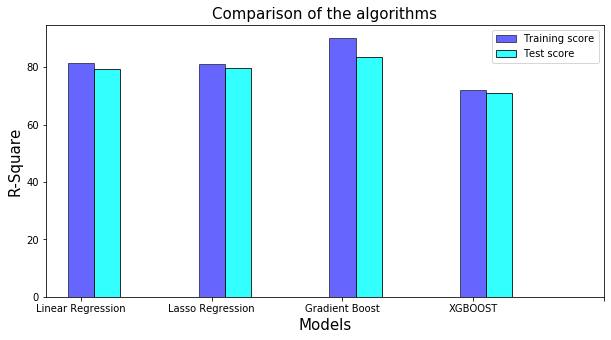

In [98]:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('R-Square',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,RSquare_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,RSquare_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5], myLabels)
plt.legend()
plt.savefig("ModelsSeller.png")
plt.show()

The gradient boost performed best on the seller's dataset. 

From the gradient boost model, the features that best predict sellers on the platform are productsPassRate, productsListed, number of social followers, days since last login on the platform, if the seller has profile picture. The xgboost model ranked these 5 features in that order. 

## Model Comparison For Buyers

In [99]:
myLabels = [ 'Linear Regression','Lasso Regression','Gradient Boost', 'XGBOOST']
RSquare_testb = [ LRB_Test, LassoB_Test, gradient_Test, xgboostB_Test ]
RSquare_trainb = [ LRB_Train, LassoB_Train, gradient_Train, xgboostB_Train ]


score_taB = pd.DataFrame(list(zip(myLabels, RSquare_trainb, RSquare_testb)), 
               columns =['Algorithm', 'RSquare train score', 'RSquare test score' ]) 

score_taB

,Algorithm,RSquare train score,RSquare test score
0,Linear Regression,32.260299,34.410983
1,Lasso Regression,32.243275,34.402929
2,Gradient Boost,45.038247,41.593037
3,XGBOOST,28.265453,29.279595


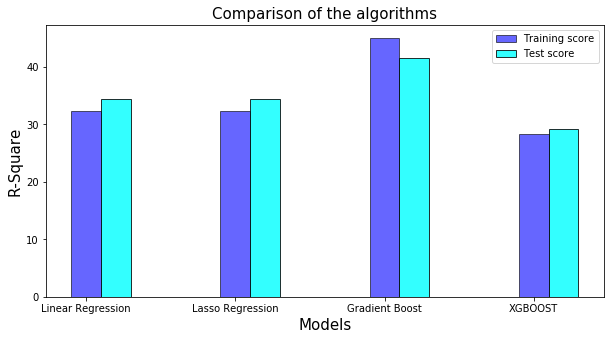

In [100]:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('R-Square',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,RSquare_trainb,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,RSquare_testb,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4], myLabels)
plt.legend()
plt.savefig("ModelsBuyer.png")
plt.show()

The gradient boost performed best on the buyer's dataset also. 

From the gradient boost model, the features that best predict buyers' behavior on the platform are productsWished, days since last login on the platform, number of social followers, productsLiked, and number of users followed by buyer. These 5 features formed the top 5 features with xgboost model.

## HYPOTHESIS TESTING FOR TOP FEATURES FOR BOTH SELLER AND BUYER

### SELLERS' TEST

Using Spearman's correlation ranking for the top three features for the seller's model

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples.

In [101]:
from scipy.stats import spearmanr
data1 = Xseller_train['ScproductsPassRate']
data2 = yseller_train
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.681, p=0.000
Probably dependent


In [102]:
from scipy.stats import spearmanr
data1 = Xseller_train['ScproductsListed']
data2 = yseller_train
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.557, p=0.000
Probably dependent


In [103]:
from scipy.stats import spearmanr
data1 = Xseller_train['ScSocialNbFollowers']
data2 = yseller_train
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.325, p=0.000
Probably dependent


The three features (productsPassRate, productsListed & SocialNbFollowers) have been confirmed to have relationships with number of sales generated on the platform.

## BUYER'S TEST

Spearman's correlation rankling will also be used for this hypothesis testing.

In [104]:
from scipy.stats import spearmanr
data1 = Xbuyer_train['ScproductsWished']
data2 = ybuyer_train
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.343, p=0.000
Probably dependent


In [105]:
from scipy.stats import spearmanr
data1 = Xbuyer_train['ScSocialNbFollowers']
data2 = ybuyer_train
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.303, p=0.000
Probably dependent


In [106]:
from scipy.stats import spearmanr
data1 = Xbuyer_train['ScdaysSinceLastLogin']
data2 = ybuyer_train
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.261, p=0.000
Probably dependent


The three features (productsWished, daysSinceLastLogin & SocialNbFollowers) have been confirmed to have relationships with predicting if a user can will buy on the platform or not.